In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [6]:
from IPython.display import IFrame
IFrame("../assets/testbed.png", width=850, height=480)

In [7]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets_pcm/random_input_exp-7.csv')

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Columns: 169 entries, input_rate to packetsize
dtypes: float64(166), int64(1), object(2)
memory usage: 1.9+ MB


In [8]:
data["ndpi_stats-pcm_processed_Socket 0-L3MPI"] = data["ndpi_stats-pcm_processed_Socket 0-L3MPI"].astype(float)
#print(data["ndpi_stats-pcm_processed_Socket 0-L3MPI"])

In [9]:
corr = data.corr()

corr_list = []
for i in range(1,2):  # Iterate through all but the last column
    for j in range(i+1, len(corr.columns)):  # Compare with subsequent columns
        # Only add to the list if absolute correlation is greater than 0.76
        if abs(corr.iloc[i, j]) > 0.7:
            corr_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))

# No need to sort if you're only interested in correlations greater than 0.76
for correlation in corr_list:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-EXEC: 0.74
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-IPC: 0.78
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-L2MISS: 0.86
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-L2MPI: 0.86
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-WRITE: 0.76
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INST: 0.76
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-PhysIPC: 0.78
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-PhysIPC%: 0.78
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INSTnom: 0.75
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INSTnom%: 0.76
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 1-L2MISS: 0.80
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 1-L2MPI: 0.76
Correlat

C:\Users\Qiong\AppData\Local\Temp\ipykernel_4284\3629328052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


In [10]:
# Filter out specific items from the list


corr_throughput = [item[1] for item in corr_list if item[1] not in ["tx_stats_Mbit","tx_stats_PacketRate", "tx_stats_MbitWithFraming", "packetsize"]]
print(corr_throughput)


['ndpi_stats-pcm_processed_Socket 0-EXEC', 'ndpi_stats-pcm_processed_Socket 0-IPC', 'ndpi_stats-pcm_processed_Socket 0-L2MISS', 'ndpi_stats-pcm_processed_Socket 0-L2MPI', 'ndpi_stats-pcm_processed_Socket 0-WRITE', 'ndpi_stats-pcm_processed_Socket 0-INST', 'ndpi_stats-pcm_processed_Socket 0-PhysIPC', 'ndpi_stats-pcm_processed_Socket 0-PhysIPC%', 'ndpi_stats-pcm_processed_Socket 0-INSTnom', 'ndpi_stats-pcm_processed_Socket 0-INSTnom%', 'ndpi_stats-pcm_processed_Socket 1-L2MISS', 'ndpi_stats-pcm_processed_Socket 1-L2MPI', 'ndpi_stats-pcm_processed_Socket 1-READ', 'ndpi_stats-pcm_processed_DRAM Energy (Joules)-SKT1', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-EXEC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-IPC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-L2MISS', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-L2MPI', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-INST', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-PhysIPC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-PhysIPC%', 'ndpi_stats-pcm_proc

# several ML algorithm to predict rate

In [169]:
#!pip install lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [170]:
# training  

X = data[corr_throughput]
y = data['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# ML model
#model = DecisionTreeRegressor(random_state=0)
model = lgb.LGBMRegressor(random_state=0)
#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)


# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

C:\Users\Qiong\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Qiong\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4654
[LightGBM] [Info] Number of data points in the train set: 1030, number of used features: 30
[LightGBM] [Info] Start training from score 4667.199406
Accuracy within 5% threshold: 42.30769230769231
[0.0, 62.66968325791855, 78.50678733031674, 85.52036199095022, 89.36651583710407, 92.53393665158372, 94.11764705882352, 95.47511312217195, 95.92760180995475, 96.38009049773756, 96.83257918552036]


# ANN to predict throughput (training set: random_set_7)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

1472


In [172]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# Add output layer
model.add(Dense(1))

In [173]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=4, epochs=100, verbose=1)

Epoch 1/100
258/258 [==============================] - 5s 7ms/step - loss: 6322679.0000
Epoch 2/100
258/258 [==============================] - 2s 6ms/step - loss: 1063576.5000
Epoch 3/100
258/258 [==============================] - 2s 7ms/step - loss: 870376.5000
Epoch 4/100
258/258 [==============================] - 2s 7ms/step - loss: 946015.0625
Epoch 5/100
258/258 [==============================] - 2s 7ms/step - loss: 845694.6875
Epoch 6/100
258/258 [==============================] - 2s 6ms/step - loss: 883474.3125
Epoch 7/100
258/258 [==============================] - 2s 8ms/step - loss: 827764.1250
Epoch 8/100
258/258 [==============================] - 2s 7ms/step - loss: 881010.1875
Epoch 9/100
258/258 [==============================] - 2s 6ms/step - loss: 815610.6875
Epoch 10/100
258/258 [==============================] - 2s 7ms/step - loss: 824066.1250
Epoch 11/100
258/258 [==============================] - 2s 7ms/step - loss: 801811.6875
Epoch 12/100
258/258 [=================

258/258 [==============================] - 1s 4ms/step - loss: 683146.8125
Epoch 95/100
258/258 [==============================] - 1s 4ms/step - loss: 683997.9375
Epoch 96/100
258/258 [==============================] - 1s 4ms/step - loss: 667823.6875
Epoch 97/100
258/258 [==============================] - 1s 4ms/step - loss: 667354.5000
Epoch 98/100
258/258 [==============================] - 1s 4ms/step - loss: 668581.8750
Epoch 99/100
258/258 [==============================] - 1s 4ms/step - loss: 724121.2500
Epoch 100/100
258/258 [==============================] - 1s 5ms/step - loss: 668563.1250


14/14 [==============================] - 0s 2ms/step
[0.0, 70.58823529411765, 85.97285067873304, 89.14027149321268, 91.4027149321267, 93.89140271493213, 95.02262443438913, 95.47511312217195, 96.15384615384616, 96.83257918552036, 97.51131221719457]


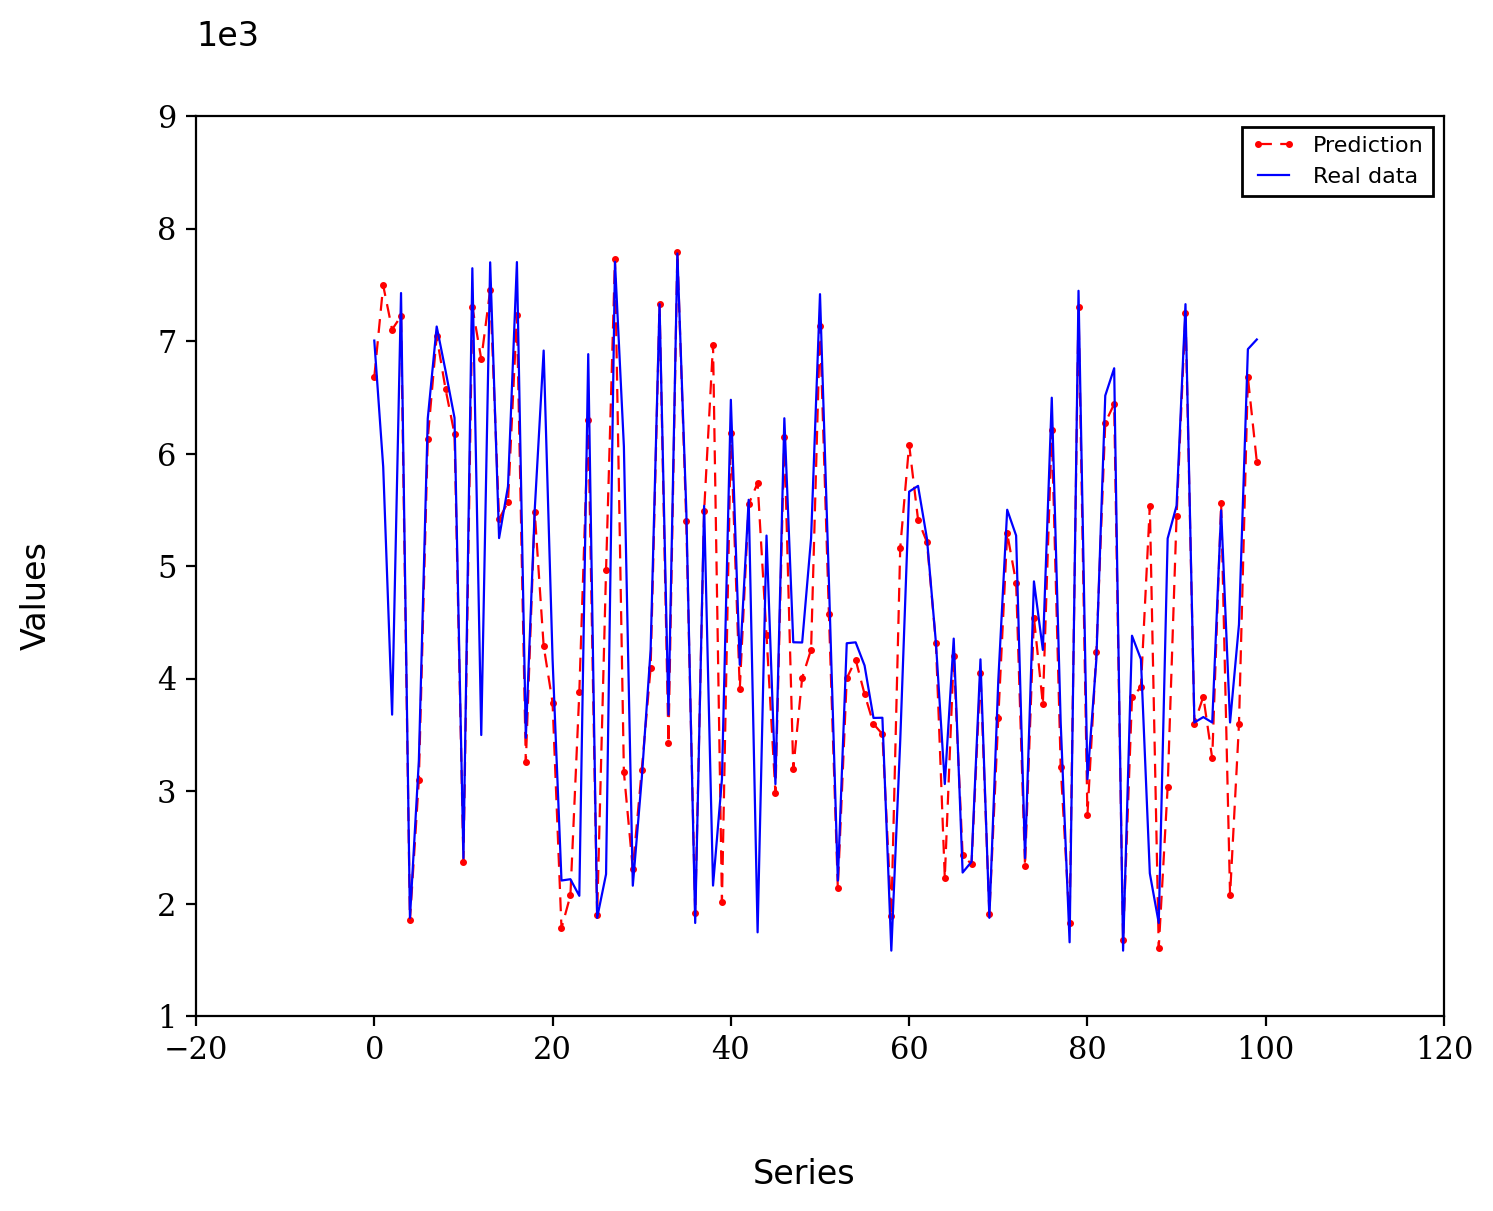

In [16]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)

distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()


# K-fold cross over

In [17]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

kf = KFold(n_splits=5, shuffle=True, random_state=0)  # 5-fold

scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    model = create_model(X_train.shape[1])
    
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    
  #  scores.append(model.evaluate(X_test, y_test, verbose=0))

#print("平均分数：", np.mean(scores))


10/10 [==============================] - 0s 2ms/step
[0.0, 60.204081632653065, 75.51020408163265, 84.6938775510204, 89.79591836734694, 92.85714285714286, 95.91836734693877, 96.93877551020408, 98.29931972789116, 98.29931972789116, 98.29931972789116]


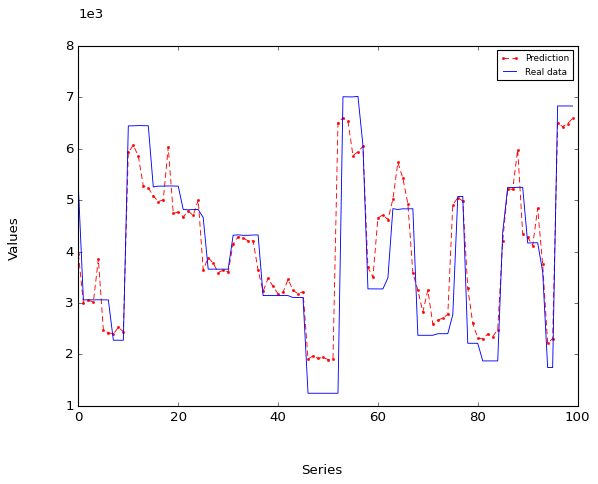

In [18]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()


# RNN (timewindow=1)

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error

import numpy as np

In [162]:
# training  

X = data[corr_throughput]
y = data['output_rate']

#shift one point for prediction
# Define the split point

y_shifted = y.shift(-1).dropna()
X_adjusted = X.iloc[:-1]
split_point_adjusted = int(len(X_adjusted) * 0.7)

# Split the data sequentially with the adjusted indices.
X_train_seq = X_adjusted.iloc[:split_point_adjusted]
X_test_seq = X_adjusted.iloc[split_point_adjusted:]
y_train_seq = y_shifted.iloc[:split_point_adjusted]
y_test_seq = y_shifted.iloc[split_point_adjusted:]




# Split the data sequentially
#X_train_seq = X.iloc[:split_point]
#X_test_seq = X.iloc[split_point:]
#y_train_seq = y.iloc[:split_point]
#y_test_seq = y.iloc[split_point:]

y_train_np = y_train_seq.to_numpy()
y_test_np = y_test_seq.to_numpy()


# 

X_train_np = X_train_seq.to_numpy().reshape((X_train_seq.shape[0], 1, X_train_seq.shape[1]))
X_test_np = X_test_seq.to_numpy().reshape((X_test_seq.shape[0], 1, X_test_seq.shape[1]))


# train the regressor
model = Sequential()
#model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, 30)))  
model.add(LSTM(units=50, activation='relu', input_shape=(1, 30)))  
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_np, y_train_np, epochs=100, validation_split=0.2, verbose=1)

# Evaluate the model on test data
test_loss = model.evaluate(X_test_np, y_test_np, verbose = 1)

y_pred_np = model.predict(X_test_np)

mae = mean_absolute_error(y_test_np, y_pred_np)
mse = mean_squared_error(y_test_np, y_pred_np)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np,y_pred_np)




Epoch 1/100
26/26 [==============================] - 2s 17ms/step - loss: 22753818.0000 - val_loss: 23178382.0000
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 20531908.0000 - val_loss: 20812124.0000
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 18265902.0000 - val_loss: 18216230.0000
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 15675070.0000 - val_loss: 15273089.0000
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 12878967.0000 - val_loss: 12214156.0000
Epoch 6/100
26/26 [==============================] - 0s 5ms/step - loss: 10136071.0000 - val_loss: 9308768.0000
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 7724228.0000 - val_loss: 6848143.5000
Epoch 8/100
26/26 [==============================] - 0s 4ms/step - loss: 5859613.5000 - val_loss: 5021369.0000
Epoch 9/100
26/26 [==============================] - 0s 5ms/step - loss: 4623486.5000 - val_loss: 38

26/26 [==============================] - 0s 6ms/step - loss: 1033051.3125 - val_loss: 467872.2188
Epoch 75/100
26/26 [==============================] - 0s 5ms/step - loss: 1033716.3125 - val_loss: 460942.7500
Epoch 76/100
26/26 [==============================] - 0s 6ms/step - loss: 1033875.3750 - val_loss: 456340.4688
Epoch 77/100
26/26 [==============================] - 0s 5ms/step - loss: 1032264.5000 - val_loss: 469768.9062
Epoch 78/100
26/26 [==============================] - 0s 6ms/step - loss: 1037070.8750 - val_loss: 439144.6875
Epoch 79/100
26/26 [==============================] - 0s 5ms/step - loss: 1039395.6250 - val_loss: 436454.6875
Epoch 80/100
26/26 [==============================] - 0s 5ms/step - loss: 1038936.2500 - val_loss: 456129.6562
Epoch 81/100
26/26 [==============================] - 0s 7ms/step - loss: 1038713.6250 - val_loss: 468981.4062
Epoch 82/100
26/26 [==============================] - 0s 14ms/step - loss: 1030423.0000 - val_loss: 465846.5625
Epoch 83/100


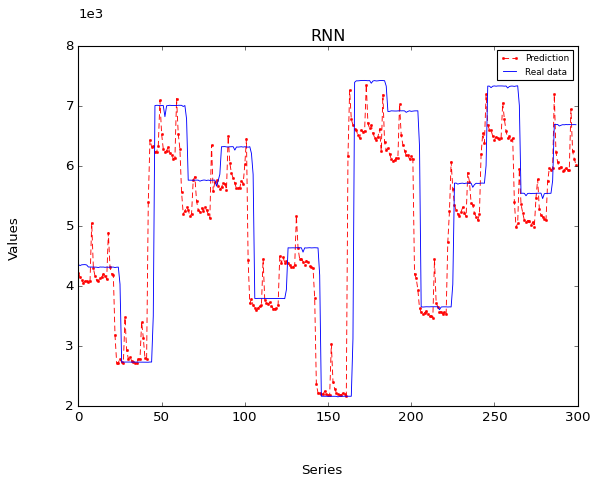

Accuracy within 5% threshold: 34.841628959276015
Time window=1 :[0.0, 59.276018099547514, 85.97285067873304, 88.68778280542986, 91.8552036199095, 95.02262443438913, 96.38009049773756, 97.28506787330316, 97.28506787330316, 97.51131221719457, 97.73755656108597]


In [163]:
# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred_flat[0:300], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test_np.tolist()[0:300], c='b',linestyle='-',linewidth = 0.8,label='Real data')
plt.title("RNN")

plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()

#accuracy
threshold = 0.05 
y_pred_flat = [item[0] for item in y_pred_np.tolist()]

distances = [abs(real - pred) / real for real, pred in zip(y_test_np.tolist(),y_pred_flat)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test_np.tolist(), y_pred_flat)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(f'Time window=1 :{accuracy_cdf}')

# Can RNN predict a time series several time-steps avant?


In [164]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets_pcm/random_input_exp-7.csv')

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Columns: 169 entries, input_rate to packetsize
dtypes: float64(166), int64(1), object(2)
memory usage: 1.9+ MB


In [165]:
print(data.columns)


Index(['input_rate', 'output_rate', 'latency',
       'ndpi_stats-pcm_processed_System-Date',
       'ndpi_stats-pcm_processed_System-Time',
       'ndpi_stats-pcm_processed_Socket 0-EXEC',
       'ndpi_stats-pcm_processed_Socket 0-IPC',
       'ndpi_stats-pcm_processed_Socket 0-FREQ',
       'ndpi_stats-pcm_processed_Socket 0-AFREQ',
       'ndpi_stats-pcm_processed_Socket 0-L3MISS',
       ...
       'pcm-memory_processed_SKT1-Memory (MB/s)',
       'pcm-memory_processed_System-Read', 'pcm-memory_processed_System-Write',
       'pcm-memory_processed_System-Memory', 'tx_stats_PacketRate',
       'tx_stats_Mbit', 'tx_stats_MbitWithFraming', 'tx_stats_TotalPackets',
       'tx_stats_TotalBytes', 'packetsize'],
      dtype='object', length=169)


In [166]:
def create_sequences(features, target, N=1):
    X, y = [], []
    for i in range(len(features) - N):
        X.append(features.iloc[i:(i + N)].values)
        y.append(target.iloc[i + N])
    return np.array(X), np.array(y)

# Assuming 'corr_throughput' is a list of feature column names
features = data[corr_throughput]
target = data['output_rate'] 

N = 3
X, y = create_sequences(features, target, N)



In [167]:
# Define the split point
split_point = int(len(X) * 0.7)  

# Split the data sequentially
X_train_np = X[:split_point]
X_test_np = X[split_point:]
y_train_np = y[:split_point]
y_test_np = y[split_point:]

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense



model = Sequential() 
model.add(LSTM(units=50, activation='relu', input_shape=(N, 30)))  
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_np, y_train_np, epochs=100, validation_split=0.2, verbose=1)



Epoch 1/100
26/26 [==============================] - 1s 14ms/step - loss: 17497258.0000 - val_loss: 15625486.0000
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 11443717.0000 - val_loss: 8084657.5000
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 5245932.5000 - val_loss: 2999566.2500
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 3472880.7500 - val_loss: 2422063.7500
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 3213384.0000 - val_loss: 2293096.7500
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 3120797.0000 - val_loss: 2229085.0000
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 2928460.2500 - val_loss: 2095254.6250
Epoch 8/100
26/26 [==============================] - 0s 6ms/step - loss: 2855096.0000 - val_loss: 2033286.3750
Epoch 9/100
26/26 [==============================] - 0s 6ms/step - loss: 2716380.5000 - val_loss: 1872480.87

26/26 [==============================] - 0s 6ms/step - loss: 500179.7812 - val_loss: 260432.7969
Epoch 76/100
26/26 [==============================] - 0s 6ms/step - loss: 497408.6250 - val_loss: 243907.6562
Epoch 77/100
26/26 [==============================] - 0s 5ms/step - loss: 492841.6250 - val_loss: 247313.1719
Epoch 78/100
26/26 [==============================] - 0s 5ms/step - loss: 491329.0000 - val_loss: 196841.8906
Epoch 79/100
26/26 [==============================] - 0s 6ms/step - loss: 486688.7812 - val_loss: 297301.4688
Epoch 80/100
26/26 [==============================] - 0s 7ms/step - loss: 493999.4688 - val_loss: 193372.3906
Epoch 81/100
26/26 [==============================] - 0s 5ms/step - loss: 495124.5938 - val_loss: 250690.7812
Epoch 82/100
26/26 [==============================] - 0s 4ms/step - loss: 496129.1562 - val_loss: 257355.2969
Epoch 83/100
26/26 [==============================] - 0s 4ms/step - loss: 487622.0625 - val_loss: 191036.7344
Epoch 84/100
26/26 [===

In [143]:
# Perform the first forward prediction

y_pred_1_step = model.predict(X_test_np).flatten()

#accuracy
threshold = 0.05 
y_pred = [item[0] for item in y_pred_np.tolist()]

distances = [abs(real - pred) / real for real, pred in zip(y_test_np.tolist(), y_pred_1_step )]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test_np.tolist(), y_pred_1_step)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf) 

14/14 [==============================] - 0s 2ms/step
Accuracy within 5% threshold: 63.038548752834465
[0.0, 80.72562358276643, 90.9297052154195, 94.5578231292517, 96.82539682539682, 97.73242630385488, 97.95918367346938, 98.4126984126984, 98.63945578231292, 98.63945578231292, 98.86621315192744]


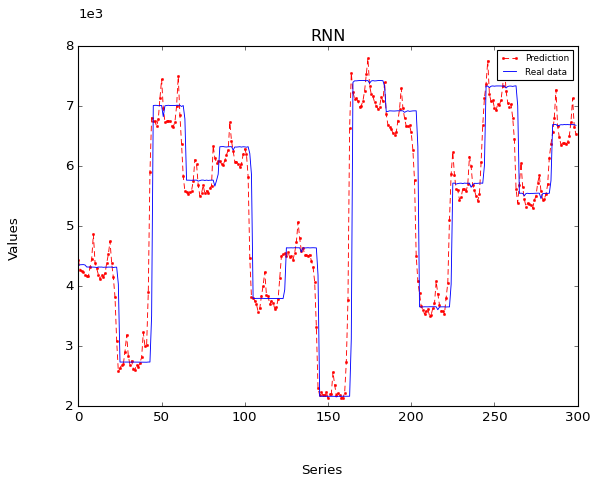

In [144]:
# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred_1_step[0:300], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test_np.tolist()[0:300], c='b',linestyle='-',linewidth = 0.8,label='Real data')
plt.title("RNN")

plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()


# solution 1, feature prediction + throughput prediction

In [145]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets_pcm/random_input_exp-7.csv')

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Columns: 169 entries, input_rate to packetsize
dtypes: float64(166), int64(1), object(2)
memory usage: 1.9+ MB


In [146]:
def create_sequences(features, N=1):
    X_feature, y_feature = [], []
    for i in range(len(features) - N):
        X_feature.append(features.iloc[i:(i + N)].values)
        y_feature.append(features.iloc[i + N].values)  
    return np.array(X_feature), np.array(y_feature)


features = data[corr_throughput] 
N = 3
X_feature, y_feature = create_sequences(features, N=3)


In [147]:
features.iloc[i + N].values
print(f'{y_feature[1]}')
print(f'\n')
print(f'{X_feature[1]}')

[1.50000e-01 2.32000e+00 1.53900e+01 2.00000e-03 6.10000e-01 7.59397e+03
 4.65000e+00 1.16220e+02 2.90000e-01 7.31000e+00 2.04000e+00 1.30000e-03
 4.20000e-01 4.40000e+00 4.00000e-01 2.65000e+00 2.30000e+00 2.20000e-03
 1.03668e+03 5.31000e+00 1.32710e+02 8.00000e-01 1.99500e+01 2.05010e+02
 6.11240e+02 2.10620e+02 2.08070e+02 4.18690e+02 4.28540e+02 6.21090e+02]


[[1.40000e-01 2.42000e+00 1.51500e+01 2.00000e-03 6.40000e-01 7.44314e+03
  4.84000e+00 1.21010e+02 2.90000e-01 7.16000e+00 2.13000e+00 1.10000e-03
  4.60000e-01 4.40000e+00 4.00000e-01 2.65000e+00 2.25000e+00 2.10000e-03
  1.05198e+03 5.30000e+00 1.32620e+02 8.10000e-01 2.02400e+01 2.12780e+02
  6.30350e+02 2.19880e+02 2.17890e+02 4.37760e+02 4.48000e+02 6.40580e+02]
 [1.50000e-01 2.35000e+00 1.55200e+01 2.00000e-03 6.30000e-01 7.61511e+03
  4.69000e+00 1.17320e+02 2.90000e-01 7.34000e+00 2.08000e+00 1.10000e-03
  4.40000e-01 4.40000e+00 4.10000e-01 2.63000e+00 2.32000e+00 2.20000e-03
  1.05933e+03 5.26000e+00 1.31570e+02 8

In [148]:
# Define the split point
split_point = int(len(X) * 0.7)  

# Split the data sequentially
X_train_feature = X_feature[:split_point]
X_test_feature = X_feature[split_point:]
y_train_feature = y_feature[:split_point]
y_test_feature = y_feature[split_point:]


In [149]:
N

3

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense



model_feature = Sequential() 
model_feature.add(LSTM(units=50, activation='relu', input_shape=(N, 30)))  
model_feature.add(Dense(len(corr_throughput)))  # Output layer for regression
model_feature.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_feature.fit(X_train_feature, y_train_feature, epochs=100, validation_split=0.2, verbose=1)



Epoch 1/100
26/26 [==============================] - 2s 24ms/step - loss: 2472591.5000 - val_loss: 2292281.7500
Epoch 2/100
26/26 [==============================] - 0s 8ms/step - loss: 2090795.5000 - val_loss: 1766531.8750
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 1310302.6250 - val_loss: 731301.3125
Epoch 4/100
26/26 [==============================] - 0s 10ms/step - loss: 320912.9688 - val_loss: 25128.0625
Epoch 5/100
26/26 [==============================] - 0s 18ms/step - loss: 21127.7363 - val_loss: 10825.2520
Epoch 6/100
26/26 [==============================] - 0s 17ms/step - loss: 12835.7080 - val_loss: 8906.0967
Epoch 7/100
26/26 [==============================] - 0s 15ms/step - loss: 11709.0352 - val_loss: 8388.7480
Epoch 8/100
26/26 [==============================] - 0s 13ms/step - loss: 11096.2734 - val_loss: 7917.4766
Epoch 9/100
26/26 [==============================] - 0s 12ms/step - loss: 10370.6836 - val_loss: 7404.5254
Epoch 10/100
26/26 [=

Epoch 78/100
26/26 [==============================] - 0s 7ms/step - loss: 3889.1997 - val_loss: 3222.7527
Epoch 79/100
26/26 [==============================] - 0s 8ms/step - loss: 3847.2437 - val_loss: 3234.2891
Epoch 80/100
26/26 [==============================] - 0s 4ms/step - loss: 3885.0132 - val_loss: 3145.0527
Epoch 81/100
26/26 [==============================] - 0s 4ms/step - loss: 3830.9270 - val_loss: 3118.4380
Epoch 82/100
26/26 [==============================] - 0s 4ms/step - loss: 3780.7129 - val_loss: 3145.0913
Epoch 83/100
26/26 [==============================] - 0s 5ms/step - loss: 3814.4497 - val_loss: 3205.7029
Epoch 84/100
26/26 [==============================] - 0s 5ms/step - loss: 3789.2156 - val_loss: 3172.9009
Epoch 85/100
26/26 [==============================] - 0s 4ms/step - loss: 3780.5813 - val_loss: 3146.3030
Epoch 86/100
26/26 [==============================] - 0s 5ms/step - loss: 3783.1221 - val_loss: 3165.3921
Epoch 87/100
26/26 [==========================

In [151]:
# 假设X_test_np[i]是当前时间窗口的输入
#predicted_features = model_feature.predict(X_test_np[i].reshape(1, 3, 30))

# y_pred_1_step est base on X_test_np

y_pred_2_steps = []


for i in range(len(X_test_np)-1):  
   
    new_sequence = np.copy(X_test_np[i])
    predicted_features = model_feature.predict(X_test_feature[i].reshape(1, 3, 30))
    new_sequence = np.vstack([new_sequence[1:], predicted_features])
    
    new_sequence_reshaped = new_sequence.reshape(1, 3, 30)
    
    y_pred_2_step = model.predict(new_sequence_reshaped)
    y_pred_2_steps.append(y_pred_2_step[0])

y_pred_2_steps = np.array(y_pred_2_steps)


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 49ms/step


In [155]:
#accuracy
threshold = 0.05 
y_true_shifted = y_test_np[2:] 
y_pred_2_steps_aligned = y_pred_2_steps[:len(y_true_shifted)]

distances = [abs(real - pred) / real for real, pred in zip(y_true_shifted.tolist(),y_pred_2_steps_aligned)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_true_shifted.tolist(), y_pred_2_steps_aligned)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf) 

Accuracy within 5% threshold: [56.03644647]
[array([0.]), array([83.82687927]), array([93.84965831]), array([97.49430524]), array([98.40546697]), array([98.86104784]), array([99.08883827]), array([99.3166287]), array([99.54441913]), array([99.54441913]), array([99.77220957])]


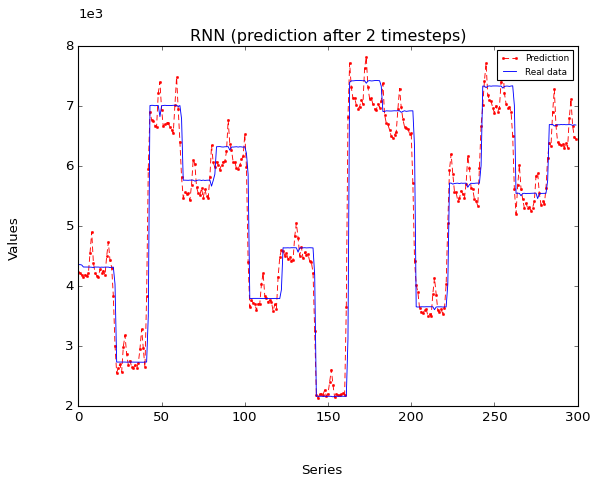

In [156]:
# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred_2_steps_aligned[0:300], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_true_shifted.tolist()[0:300], c='b',linestyle='-',linewidth = 0.8,label='Real data')
plt.title("RNN (prediction after 2 timesteps)")

plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()
